### First let's import and read all our sediment data: 
Each individual csv file is an individual sediment basket

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# directory where the CSV files are located
folder_path = "imports"

# list all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# loop through each CSV file and read it into a DataFrame and create variables
for csv_file in csv_files:
    file_name = os.path.splitext(csv_file)[0]  # Get the file name without the extension
    file_path = os.path.join(folder_path, csv_file)
    # create a variable with the file name and store the DataFrame
    exec(f"{file_name} = pd.read_csv(file_path)")


GSD plot: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


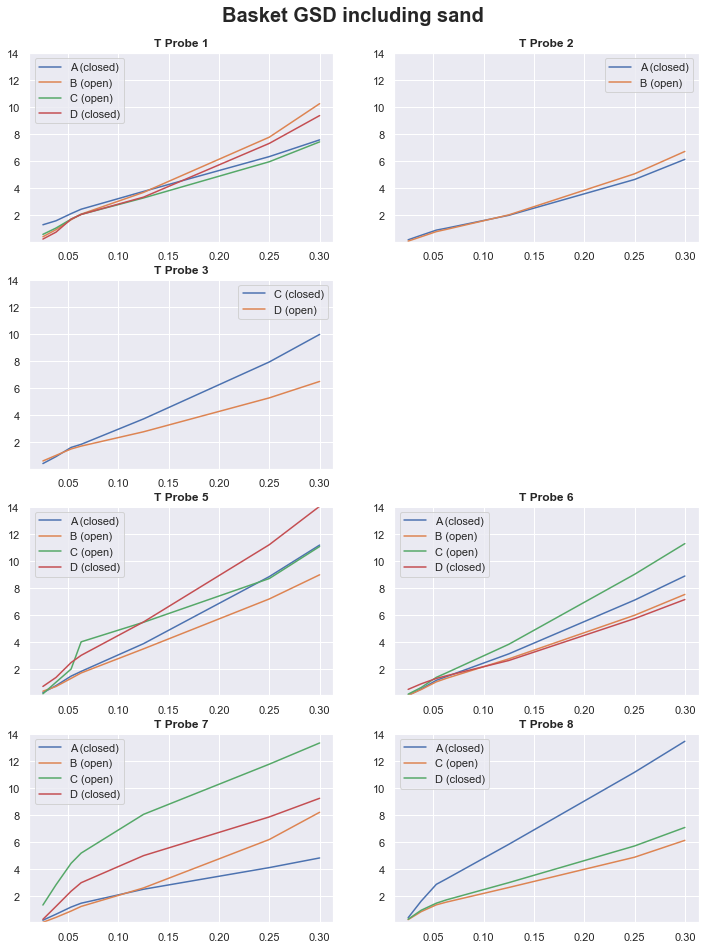

In [92]:
# sort the DataFrame by sieve size
df = percent_finer.sort_values(by='Sieve Size (mm)') # we do this or else it will look mirrored
df.set_index("Sieve Size (mm)", inplace=True)
df = df.iloc[:7]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
ax5 = axes[2, 0]
ax6 = axes[2, 1]
ax7 = axes[3, 0]
ax8 = axes[3, 1]

# T1 (25)
ax1.plot(df['T25A'], label='A (closed)')
ax1.plot(df['T25B'], label='B (open)')
ax1.plot(df['T25C'], label='C (open)')
ax1.plot(df['T25D'], label='D (closed)')

# T2 (8)
ax2.plot(df['T8A'], label='A (closed)')
ax2.plot(df['T8B'], label='B (open)')

# T3 (0)
ax3.plot(df['T0C'], label='C (closed)')
ax3.plot(df['T0D'], label='D (open)')

# T5 (4)
ax5.plot(df['T4A'], label='A (closed)')
ax5.plot(df['T4B'], label='B (open)')
ax5.plot(df['T4C'], label='C (open)')
ax5.plot(df['T4D'], label='D (closed)')

# T6 (5)
ax6.plot(df['T5A'], label='A (closed)')
ax6.plot(df['T5B'], label='B (open)')
ax6.plot(df['T5C'], label='C (open)')
ax6.plot(df['T5D'], label='D (closed)')


# T7 (6)
ax7.plot(df['T6A'], label='A (closed)')
ax7.plot(df['T6B'], label='B (open)')
ax7.plot(df['T6C'], label='C (open)')
ax7.plot(df['T6D'], label='D (closed)')


# T8 (7)
ax8.plot(df['T7A'], label='A (closed)')
ax8.plot(df['T7C'], label='C (open)')
ax8.plot(df['T7D'], label='D (closed)')


# set labels, title, scale and set the same y-axis limits for all subplots
title_font = {'weight': 'bold', 'size': 12}
fig.delaxes(ax4)
fig.suptitle('Basket GSD including sand', fontsize=20, fontweight='bold', x=0.5, y=0.92)
min_y = min(df.min())
max_y = max(df.max())
for i, ax in enumerate(axes.flat):
    ax.set_title(f'T Probe {i + 1}', fontdict=title_font)
    ax.legend(loc='best')
    #ax.set_xscale('log')
    ax.set_ylim(min_y, max_y)

# show the plot
plt.show()

In [1]:
# Calculate D values (D10, D30, D60) as percentiles
def calculate_percentiles(grain_sizes, percent_passing):
    d10 = np.interp(10, percent_passing, grain_sizes)
    d30 = np.interp(30, percent_passing, grain_sizes)
    d60 = np.interp(60, percent_passing, grain_sizes)
    return d10, d30, d60

In [2]:



# Calculate D10, D30, and D60
d10, d30, d60 = calculate_percentiles(grain_sizes, percent_passing)

# Display the results
print(f'D10: {d10:.2f} mm')
print(f'D30: {d30:.2f} mm')
print(f'D60: {d60:.2f} mm')

D10: 0.03 mm
D30: 0.03 mm
D60: 0.03 mm


In [3]:
grain_sizes

array([5.   , 1.   , 0.85 , 0.3  , 0.25 , 0.125, 0.063, 0.053, 0.038,
       0.025])

In [4]:
percent_passing

array([100.        ,  44.49114418,  35.828248  ,   7.5862025 ,
         6.35125908,   3.77608515,   2.46286768,   2.13615857,
         1.60780869,   1.31343017])